### Download Crypto Data

In [85]:
from download import data_crypto
con = data_crypto.data_crypto()

params = {"crypto": 'SLP',
          "days_back": 5,
          "time": '1DAY'}

c_data = con.crypto_download(params)

In [86]:
c_data.head()

,Date,Open,High,Low,Close,Volumen,Volumen USD
0,2022-03-07 01:00:00,0.0175,0.0190,0.0172,0.0177,3.934403e+09,7.136818e+07
1,2022-03-08 01:00:00,0.0178,0.0185,0.0176,0.0179,1.993615e+09,3.586584e+07
2,2022-03-09 01:00:00,0.0179,0.0191,0.0178,0.0184,2.615697e+09,4.824423e+07
3,2022-03-10 01:00:00,0.0183,0.0184,0.0173,0.0175,1.615015e+09,2.849961e+07
4,2022-03-11 01:00:00,0.0175,0.0178,0.0169,0.0170,1.356672e+09,2.344754e+07


### Bollinger Bands

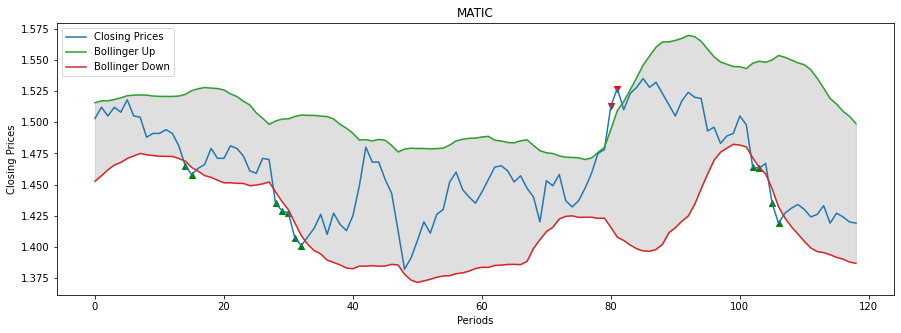

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def get_bollinger_bands(prices, rate=20):
    sma = prices.rolling(rate).mean() # <-- Get SMA for 20 days
    std = prices.rolling(rate).std() # <-- Get rolling standard deviation for 20 days
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return sma, std, bollinger_up, bollinger_down

closing_prices = c_data['Close'] # Use only closing prices
sma, std, bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)
df = pd.DataFrame(list(zip(closing_prices, bollinger_down, bollinger_up, sma)), columns=['Close', 'Lower', 'Upper', 'SMA'])

#High and Low prices
df['High'] = c_data.High
df['Low'] = c_data.Low

#Buy and Sell Signals with Close Price
df['Buy_Signal'] = np.where(df['Lower'] > df['Close'], True, False)
df['Sell_Signal'] = np.where(df['Upper'] < df['Close'], True, False)
df.dropna(inplace=True)
df.reset_index(inplace=True)

#Plot
figure(figsize=(15, 5))
plt.title(params['crypto'])
plt.xlabel('Periods')
plt.ylabel('Closing Prices')
plt.plot(df.Close, label='Closing Prices', c='tab:blue')
plt.plot(df.Upper, label='Bollinger Up', c='tab:green')
plt.plot(df.Lower, label='Bollinger Down', c='tab:red')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.25)
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close, marker='^', c='g')
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close, marker='v', c='r')
plt.legend()
plt.show()

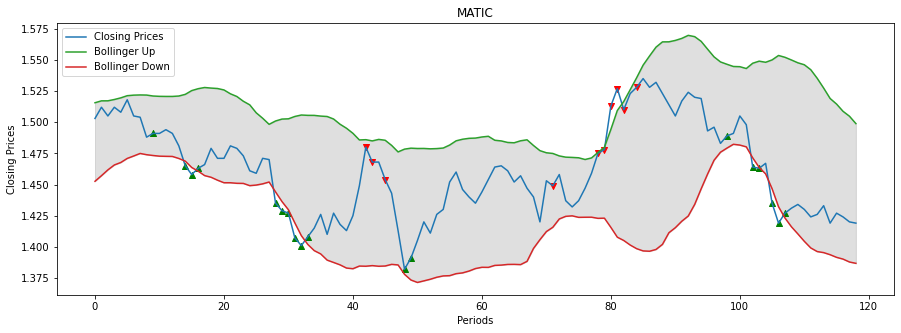

In [79]:
#Buy and Sell Signals with Low and High Price
df['Buy_Signal'] = np.where(df['Lower'] > df['Low'], True, False)
df['Sell_Signal'] = np.where(df['Upper'] < df['High'], True, False)
df.dropna(inplace=True)
df.reset_index(inplace=True)

#Plot
figure(figsize=(15, 5))
plt.title(params['crypto'])
plt.xlabel('Periods')
plt.ylabel('Closing Prices')
plt.plot(df.Close, label='Closing Prices', c='tab:blue')
plt.plot(df.Upper, label='Bollinger Up', c='tab:green')
plt.plot(df.Lower, label='Bollinger Down', c='tab:red')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.25)
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close, marker='^', c='g')
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close, marker='v', c='r')
plt.legend()
plt.show()

#### Buy and Sell Signals

In [ ]:
#Agregar Comisiones: 1%
#Agregar precios minimos y maximos

Real Profit: 0.0327645051194538


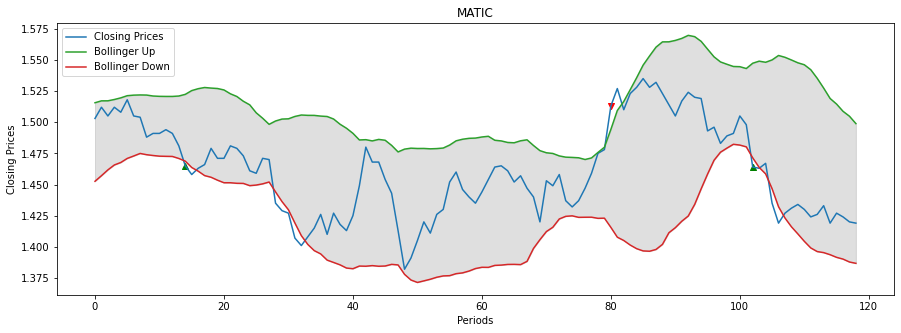

In [80]:
#Buy and Sell Signals with Close Price
buy = []
sell = []
open_pos = False

for i in range(len(df)):
    if df.Lower[i] > df.Close[i]:
        if open_pos == False:
            buy.append(i)
            open_pos = True
    elif df.Upper[i] < df.Close[i]:
        if open_pos:
            sell.append(i)
            open_pos = False

merged = pd.concat([df.iloc[buy].Close, df.iloc[sell].Close], axis=1)
merged.columns = ['Buy', 'Sell']
realprofit = (merged.shift(-1).Sell - merged.Buy) / merged.Buy 
print(f'Real Profit: {realprofit.sum()}')

            
#Plot
figure(figsize=(15, 5))
plt.title(params['crypto'])
plt.xlabel('Periods')
plt.ylabel('Closing Prices')
plt.plot(df.Close, label='Closing Prices', c='tab:blue')
plt.plot(df.Upper, label='Bollinger Up', c='tab:green')
plt.plot(df.Lower, label='Bollinger Down', c='tab:red')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.25)
plt.scatter(df.iloc[buy].index, df.iloc[buy].Close, marker='^', c='g')
plt.scatter(df.iloc[sell].index, df.iloc[sell].Close, marker='v', c='r')
plt.legend()
plt.show()

Real Profit: -0.033311561071195255


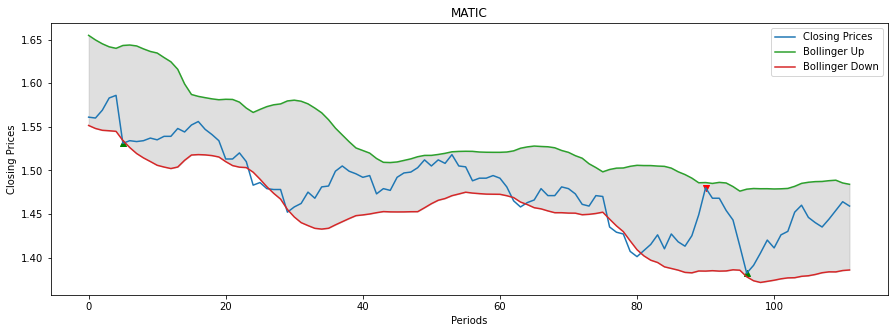

In [49]:
#Buy and Sell Signals with High and Low Prices
buy = []
sell = []
open_pos = False

for i in range(len(df)):
    if df.Lower[i] > df.Low[i]:
        if open_pos == False:
            buy.append(i)
            open_pos = True
    elif df.Upper[i] < df.High[i]:
        if open_pos:
            sell.append(i)
            open_pos = False

merged = pd.concat([df.iloc[buy].Close, df.iloc[sell].Close], axis=1)
merged.columns = ['Buy', 'Sell']
realprofit = (merged.shift(-1).Sell - merged.Buy) / merged.Buy 
print(f'Real Profit: {realprofit.sum()}')

            
#Plot
figure(figsize=(15, 5))
plt.title(params['crypto'])
plt.xlabel('Periods')
plt.ylabel('Closing Prices')
plt.plot(df.Close, label='Closing Prices', c='tab:blue')
plt.plot(df.Upper, label='Bollinger Up', c='tab:green')
plt.plot(df.Lower, label='Bollinger Down', c='tab:red')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.25)
plt.scatter(df.iloc[buy].index, df.iloc[buy].Close, marker='^', c='g')
plt.scatter(df.iloc[sell].index, df.iloc[sell].Close, marker='v', c='r')
plt.legend()
plt.show()

### MACD Analysis

Real Profit: 0.03739289105152178


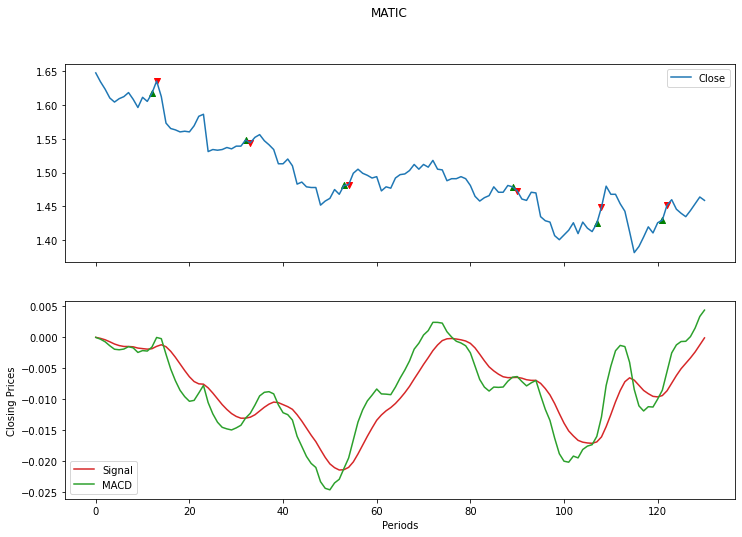

In [72]:
def MACD(prices, rateEMA1 = 12, rateEMA2 = 26, rateSignal = 9):
    ema12 = prices.ewm(span=rateEMA1).mean()
    ema26 = prices.ewm(span=rateEMA2).mean()
    macd = ema12 - ema26
    signal = macd.ewm(span=rateSignal).mean()
    return ema12, ema26, macd, signal

closing_prices = c_data['Close'] # Use only closing prices
ema12, ema26, macd, signal = MACD(closing_prices)
df_macd = pd.DataFrame(list(zip(closing_prices, ema12, ema26, macd, signal)), 
                  columns=['Close', 'EMA12', 'EMA26', 'MACD', 'Signal'])
df_macd['Volume'] = c_data['Volumen']

#Buy and Sell Prices
buy, sell = [], []
open_pos = False
risk = 0.1
for i in range(2, len(df_macd)):
    if df_macd.MACD.iloc[i] > df_macd.Signal.iloc[i] and df_macd.MACD.iloc[i-1] < df_macd.Signal.iloc[i-1]:
        if open_pos == False:
            buy.append(i)
            open_pos = True
    elif df_macd.MACD.iloc[i] < df_macd.Signal.iloc[i] and df_macd.MACD.iloc[i-1] > df_macd.Signal.iloc[i-1]:
        if open_pos:
            sell.append(i)
            open_pos = False
    #Stop Loss
    elif open_pos == True and df_macd.Close[i] < buy[-1] * (1 - risk):
            sell.append(i)
            open_pos = False
    elif open_pos == True and df_macd.Close[i] < df_macd.Close[i - 1] * (1 - risk):
            sell.append(i)
            open_pos = False

merged = pd.concat([df_macd.iloc[buy].Close, df_macd.iloc[sell].Close], axis=1)
merged.columns = ['Buy', 'Sell']
realprofit = (merged.shift(-1).Sell - merged.Buy) / merged.Buy 
print(f'Real Profit: {realprofit.sum()}')

#Plot
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12,8))
fig.suptitle(params['crypto'])
plt.xlabel('Periods')
plt.ylabel('Closing Prices')

ax1.plot(df_macd.Close, label='Close', c='tab:blue')
ax1.scatter(df_macd.iloc[buy].index, df_macd.iloc[buy].Close, marker='^', c='g')
ax1.scatter(df_macd.iloc[sell].index, df_macd.iloc[sell].Close, marker='v', c='r')
ax1.legend()

ax2.plot(df_macd.Signal, label='Signal', c='tab:red')
ax2.plot(df_macd.MACD, label='MACD', c='tab:green')
ax2.legend()

plt.show()

### ATR (Average True Range)
Average movement of price out of the last 14 candles

### RSI
Cuando la tendencia es alcista, cada vez hay mayores maximos historicos, y la tendencia del RSI es bajista (los maximos son cada vez menores), es una señal de vender.
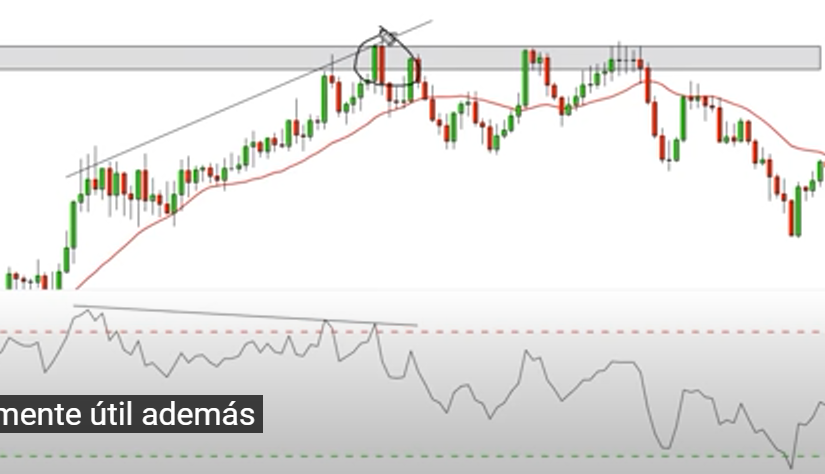
